# Proyecto de Machine Learning: Guía Completa desde la Recepción de Datos

## 1. Introducción al Proyecto y Definición del Problema de Negocio

### Objetivo de esta sección
Presentar el proyecto y vincular el problema de negocio con un problema de Machine Learning. Es crucial entender el problema antes de proponer una solución.

### 1.1 Definición del Problema Empresarial

En este notebook, trabajaremos con un ejemplo práctico: **Predicción de abandono de clientes (Churn)** en una empresa de telecomunicaciones. 

El problema de negocio es el siguiente:
- La empresa está perdiendo aproximadamente 26% de sus clientes anualmente
- Adquirir un nuevo cliente cuesta 5x más que retener uno existente
- Necesitamos identificar clientes en riesgo de abandono para tomar acciones preventivas

In [1]:
# Importación de librerías necesarias para todo el proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
%matplotlib inline

### 1.2 Mapeo a un Problema de Machine Learning

Este problema de negocio se traduce en:
- **Tipo de problema ML**: Clasificación binaria supervisada
- **Variable objetivo**: Churn (Sí/No)
- **Features**: Características del cliente, uso del servicio, información de facturación

In [2]:
# Definición del problema en términos de ML
problema_ml = {
    'tipo': 'Clasificación Binaria',
    'variable_objetivo': 'Churn',
    'clases': ['No abandona (0)', 'Abandona (1)'],
    'enfoque': 'Aprendizaje Supervisado',
    'metricas_clave': ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']
}

print("=== DEFINICIÓN DEL PROBLEMA DE ML ===")
for key, value in problema_ml.items():
    print(f"{key}: {value}")

=== DEFINICIÓN DEL PROBLEMA DE ML ===
tipo: Clasificación Binaria
variable_objetivo: Churn
clases: ['No abandona (0)', 'Abandona (1)']
enfoque: Aprendizaje Supervisado
metricas_clave: ['Precision', 'Recall', 'F1-Score', 'AUC-ROC']


### 1.3 Criterios de Éxito

In [3]:
# Definición de criterios de éxito
criterios_exito = {
    'ml_metrics': {
        'precision_minima': 0.85,
        'recall_minimo': 0.80,
        'f1_score_minimo': 0.82
    },
    'business_metrics': {
        'reduccion_churn_esperada': '15%',
        'roi_esperado': '3:1',
        'tiempo_implementacion': '3 meses'
    }
}

print("=== CRITERIOS DE ÉXITO ===")
print("\nMétricas de Machine Learning:")
for metric, value in criterios_exito['ml_metrics'].items():
    print(f"  - {metric}: {value}")
print("\nMétricas de Negocio:")
for metric, value in criterios_exito['business_metrics'].items():
    print(f"  - {metric}: {value}")

=== CRITERIOS DE ÉXITO ===

Métricas de Machine Learning:
  - precision_minima: 0.85
  - recall_minimo: 0.8
  - f1_score_minimo: 0.82

Métricas de Negocio:
  - reduccion_churn_esperada: 15%
  - roi_esperado: 3:1
  - tiempo_implementacion: 3 meses


### 1.4 Consideraciones Iniciales

In [4]:
# Evaluación de viabilidad del proyecto ML
consideraciones = {
    'es_problema_ml': {
        'complejidad_logica': 'Alta - múltiples factores interrelacionados',
        'volumen_datos': 'Suficiente - 10,000+ registros históricos',
        'variable_objetivo_clara': 'Sí - cliente abandona o no',
        'patron_identificable': 'Probable - comportamiento antes del abandono'
    },
    'cuando_usar_ml': {
        'check_1': '✓ Lógica compleja difícil de codificar',
        'check_2': '✓ Gran volumen de datos disponibles',
        'check_3': '✓ Variable objetivo bien definida',
        'check_4': '✓ Patrones históricos disponibles'
    },
    'riesgos': {
        'calidad_datos': 'Verificar completitud y consistencia',
        'sesgo_historico': 'Revisar representatividad de muestras',
        'cambios_mercado': 'Modelo puede degradarse con el tiempo'
    }
}

print("=== ANÁLISIS DE VIABILIDAD ===")
print("\n¿Es realmente un problema de ML?")
for aspecto, valor in consideraciones['es_problema_ml'].items():
    print(f"  {aspecto}: {valor}")

=== ANÁLISIS DE VIABILIDAD ===

¿Es realmente un problema de ML?
  complejidad_logica: Alta - múltiples factores interrelacionados
  volumen_datos: Suficiente - 10,000+ registros históricos
  variable_objetivo_clara: Sí - cliente abandona o no
  patron_identificable: Probable - comportamiento antes del abandono


## 2. Adquisición y Análisis Exploratorio de Datos (EDA)

### Objetivo de esta sección
Entender la naturaleza de los datos recibidos, identificar patrones, anomalías y preparar el terreno para el preprocesamiento.

### 2.1 Recopilación de Datos

In [5]:
# Simulación de carga de datos (en un caso real, cargarías desde tu fuente)
# Para este ejemplo, crearemos un dataset sintético representativo

np.random.seed(42)
n_samples = 5000

# Generación de datos sintéticos de clientes de telecomunicaciones
data = {
    'CustomerID': range(1, n_samples + 1),
    'Tenure': np.random.randint(0, 72, n_samples),  # Meses como cliente
    'MonthlyCharges': np.random.uniform(20, 120, n_samples),
    'TotalCharges': np.random.uniform(100, 8000, n_samples),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples, p=[0.5, 0.25, 0.25]),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], n_samples),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet'], n_samples),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet'], n_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples, p=[0.4, 0.4, 0.2]),
    'PhoneService': np.random.choice(['Yes', 'No'], n_samples, p=[0.9, 0.1]),
    'Gender': np.random.choice(['Male', 'Female'], n_samples),
    'SeniorCitizen': np.random.choice([0, 1], n_samples, p=[0.8, 0.2]),
    'Partner': np.random.choice(['Yes', 'No'], n_samples),
    'Dependents': np.random.choice(['Yes', 'No'], n_samples, p=[0.3, 0.7])
}

# Variable objetivo con correlación realista
churn_probability = []
for i in range(n_samples):
    prob = 0.15  # Probabilidad base
    if data['Contract'][i] == 'Month-to-month':
        prob += 0.3
    if data['Tenure'][i] < 12:
        prob += 0.2
    if data['MonthlyCharges'][i] > 80:
        prob += 0.1
    if data['TechSupport'][i] == 'No':
        prob += 0.1
    churn_probability.append(min(prob, 0.9))

data['Churn'] = np.random.binomial(1, churn_probability)

# Crear DataFrame
df = pd.DataFrame(data)

print("=== INFORMACIÓN DEL DATASET ===")
print(f"Dimensiones del dataset: {df.shape}")
print(f"Número de clientes: {df.shape[0]}")
print(f"Número de características: {df.shape[1] - 1}")  # -1 por la variable objetivo
print(f"\nPrimeras 5 filas del dataset:")
df.head()

=== INFORMACIÓN DEL DATASET ===
Dimensiones del dataset: (5000, 16)
Número de clientes: 5000
Número de características: 15

Primeras 5 filas del dataset:


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,OnlineSecurity,TechSupport,InternetService,PhoneService,Gender,SeniorCitizen,Partner,Dependents,Churn
0,1,51,118.950533,1420.361087,One year,Electronic check,No,No internet,No,DSL,No,Female,0,Yes,Yes,0
1,2,14,88.431425,3316.672535,Month-to-month,Bank transfer,Yes,Yes,No,Fiber optic,Yes,Female,0,Yes,No,0
2,3,71,114.898067,1934.959582,Month-to-month,Mailed check,No,No,No internet,Fiber optic,Yes,Female,0,No,No,0
3,4,60,34.255656,4324.927718,One year,Bank transfer,No,No internet,Yes,DSL,Yes,Female,1,Yes,No,0
4,5,20,58.213947,1670.745389,Two year,Electronic check,No,No internet,No internet,Fiber optic,Yes,Male,0,Yes,No,0


### 2.2 Tipos de Datos e Información Básica

In [6]:
# Análisis de tipos de datos
print("=== TIPOS DE DATOS ===")
print(df.dtypes)

# Información general del dataset
print("\n=== INFORMACIÓN GENERAL DEL DATASET ===")
df.info()

# Identificación de características numéricas y categóricas
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nCaracterísticas numéricas ({len(numerical_features)}): {numerical_features}")
print(f"Características categóricas ({len(categorical_features)}): {categorical_features}")

=== TIPOS DE DATOS ===
CustomerID            int64
Tenure                int32
MonthlyCharges      float64
TotalCharges        float64
Contract             object
PaymentMethod        object
PaperlessBilling     object
OnlineSecurity       object
TechSupport          object
InternetService      object
PhoneService         object
Gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
Churn                 int32
dtype: object

=== INFORMACIÓN GENERAL DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        5000 non-null   int64  
 1   Tenure            5000 non-null   int32  
 2   MonthlyCharges    5000 non-null   float64
 3   TotalCharges      5000 non-null   float64
 4   Contract          5000 non-null   object 
 5   PaymentMethod     5000 non-null  

### 2.3 Estadística Descriptiva

In [7]:
# Estadísticas descriptivas para variables numéricas
print("=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===")
df[numerical_features].describe()

=== ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS ===


,CustomerID,Tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,35.299000,69.315743,4036.649523,0.202000,0.40100
std,1443.520003,20.646851,28.611204,2300.306717,0.401532,0.49015
min,1.000000,0.000000,20.005283,101.246182,0.000000,0.00000
25%,1250.750000,18.000000,44.819872,2023.120205,0.000000,0.00000
50%,2500.500000,35.000000,68.639833,3985.489365,0.000000,0.00000
75%,3750.250000,53.000000,93.818694,6077.108993,0.000000,1.00000
max,5000.000000,71.000000,119.946068,7997.418321,1.000000,1.00000


=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CHURN) ===
Conteo absoluto:
Churn
0    2995
1    2005
Name: count, dtype: int64

Porcentaje:
Churn
0    59.9
1    40.1
Name: proportion, dtype: float64


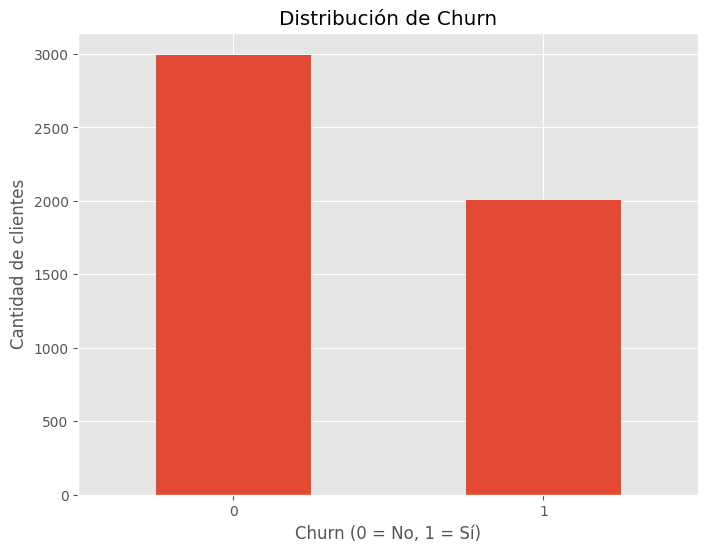

In [8]:
# Análisis de la variable objetivo
print("=== DISTRIBUCIÓN DE LA VARIABLE OBJETIVO (CHURN) ===")
churn_dist = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print("Conteo absoluto:")
print(churn_dist)
print("\nPorcentaje:")
print(churn_pct)

# Visualización
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribución de Churn')
plt.xlabel('Churn (0 = No, 1 = Sí)')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.show()

# Verificar si hay desbalance de clases
if churn_pct.min() < 20:
    print("\n⚠️ ADVERTENCIA: Dataset desbalanceado detectado. Considerar técnicas de balanceo.")

### 2.4 Exploración Visual de Datos

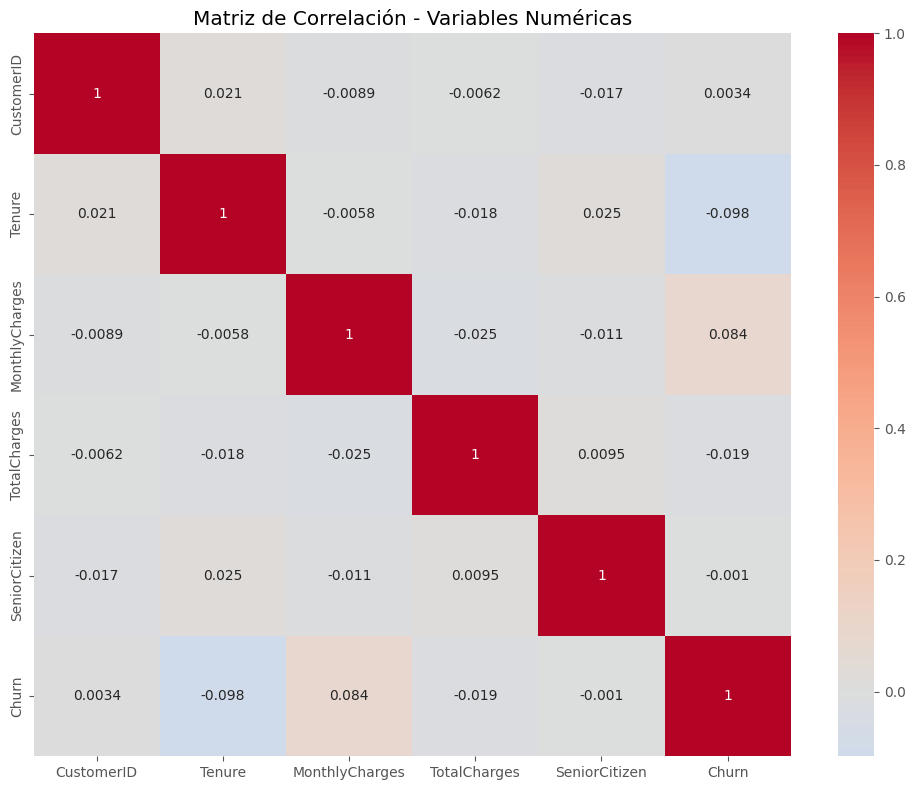

In [9]:
# Matriz de correlación para variables numéricas
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

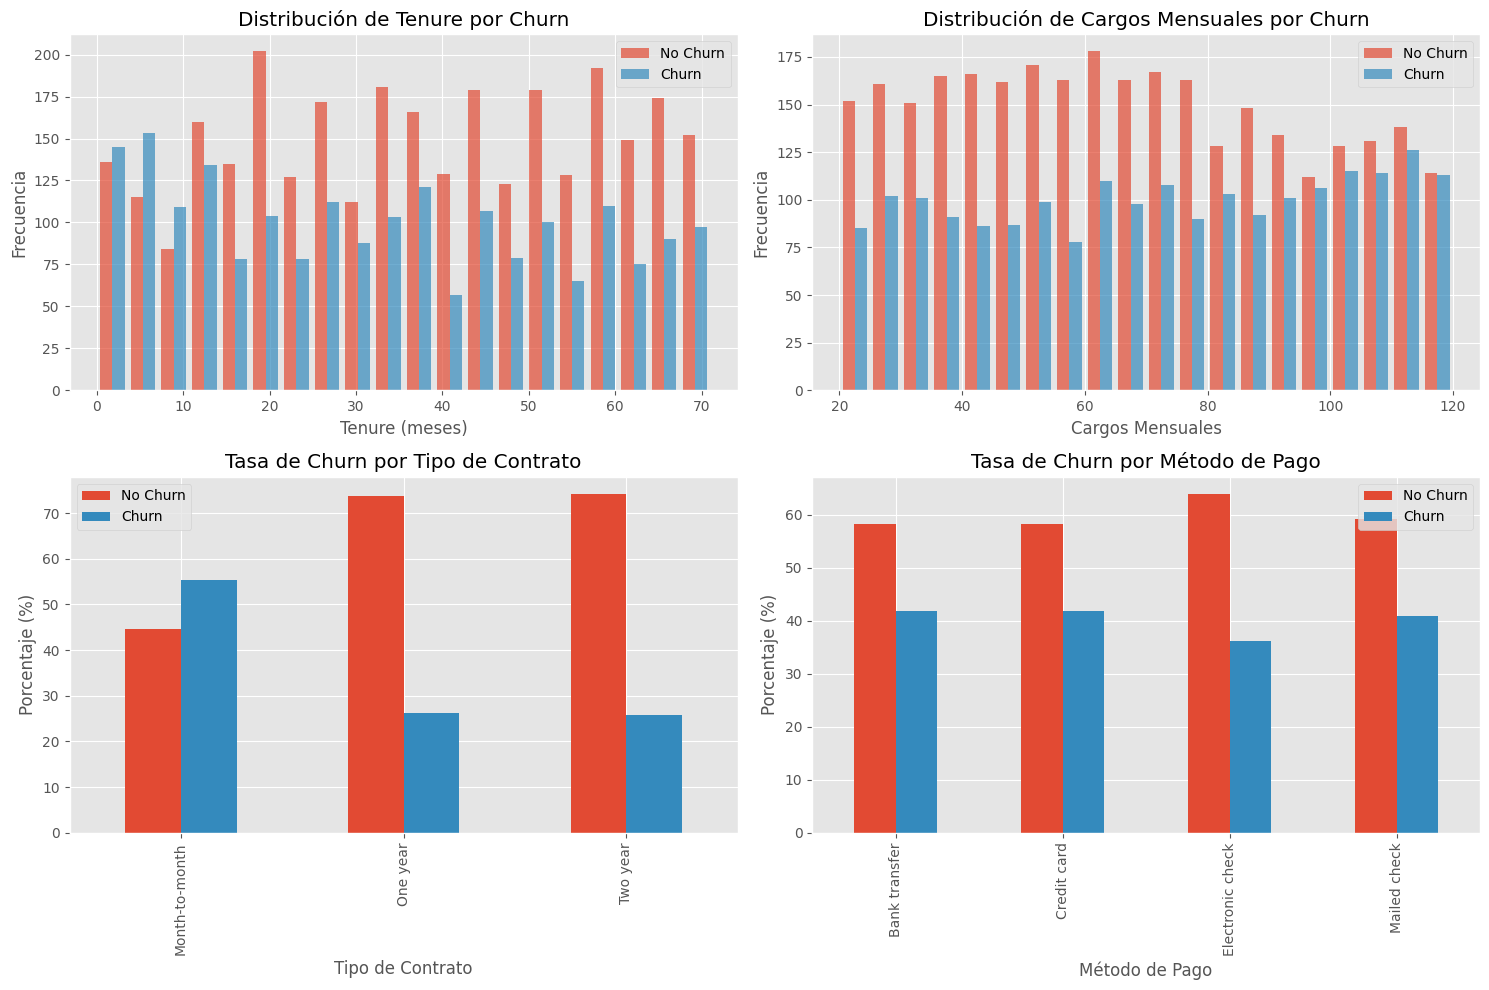

In [10]:
# Análisis de distribuciones por variable objetivo
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Tenure vs Churn
axes[0, 0].hist([df[df['Churn']==0]['Tenure'], df[df['Churn']==1]['Tenure']], 
                label=['No Churn', 'Churn'], bins=20, alpha=0.7)
axes[0, 0].set_xlabel('Tenure (meses)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].set_title('Distribución de Tenure por Churn')
axes[0, 0].legend()

# MonthlyCharges vs Churn
axes[0, 1].hist([df[df['Churn']==0]['MonthlyCharges'], df[df['Churn']==1]['MonthlyCharges']], 
                label=['No Churn', 'Churn'], bins=20, alpha=0.7)
axes[0, 1].set_xlabel('Cargos Mensuales')
axes[0, 1].set_ylabel('Frecuencia')
axes[0, 1].set_title('Distribución de Cargos Mensuales por Churn')
axes[0, 1].legend()

# Contract type vs Churn
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Tasa de Churn por Tipo de Contrato')
axes[1, 0].set_ylabel('Porcentaje (%)')
axes[1, 0].set_xlabel('Tipo de Contrato')
axes[1, 0].legend(['No Churn', 'Churn'])

# PaymentMethod vs Churn
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Tasa de Churn por Método de Pago')
axes[1, 1].set_ylabel('Porcentaje (%)')
axes[1, 1].set_xlabel('Método de Pago')
axes[1, 1].legend(['No Churn', 'Churn'])

plt.tight_layout()
plt.show()

### 2.5 Detección de Problemas en los Datos

In [11]:
# Verificación de valores faltantes
print("=== ANÁLISIS DE VALORES FALTANTES ===")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores_Faltantes': missing_values.values,
    'Porcentaje': missing_percentage.values
})

print(missing_df[missing_df['Valores_Faltantes'] > 0])

if missing_values.sum() == 0:
    print("✅ No se encontraron valores faltantes en el dataset")

# Verificación de duplicados
print("\n=== ANÁLISIS DE DUPLICADOS ===")
duplicates = df.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")

if duplicates > 0:
    print(f"Porcentaje de duplicados: {(duplicates/len(df))*100:.2f}%")
else:
    print("✅ No se encontraron registros duplicados")

=== ANÁLISIS DE VALORES FALTANTES ===
Empty DataFrame
Columns: [Columna, Valores_Faltantes, Porcentaje]
Index: []
✅ No se encontraron valores faltantes en el dataset

=== ANÁLISIS DE DUPLICADOS ===
Número de filas duplicadas: 0
✅ No se encontraron registros duplicados


=== DETECCIÓN DE OUTLIERS ===

Tenure:
  - Límite inferior: -34.50
  - Límite superior: 105.50
  - Número de outliers: 0 (0.00%)

MonthlyCharges:
  - Límite inferior: -28.68
  - Límite superior: 167.32
  - Número de outliers: 0 (0.00%)

TotalCharges:
  - Límite inferior: -4057.86
  - Límite superior: 12158.09
  - Número de outliers: 0 (0.00%)


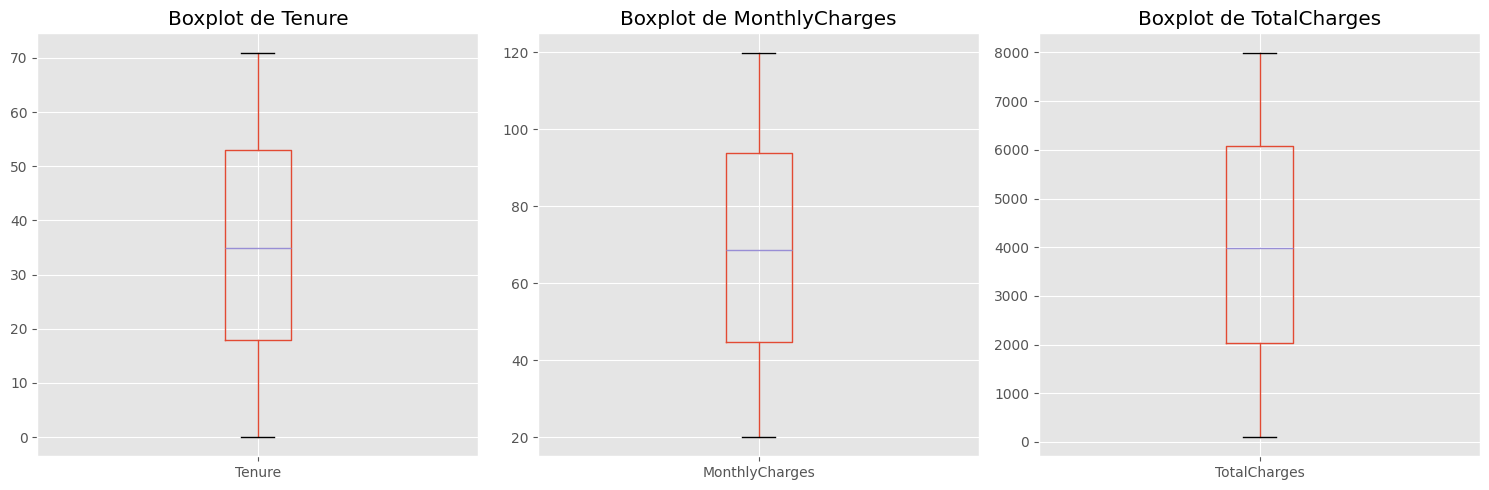

In [12]:
# Detección de outliers usando el método IQR
print("=== DETECCIÓN DE OUTLIERS ===")

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis de outliers para variables numéricas clave
for col in ['Tenure', 'MonthlyCharges', 'TotalCharges']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    print(f"\n{col}:")
    print(f"  - Límite inferior: {lower:.2f}")
    print(f"  - Límite superior: {upper:.2f}")
    print(f"  - Número de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

# Visualización de outliers
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, col in enumerate(['Tenure', 'MonthlyCharges', 'TotalCharges']):
    df.boxplot(column=col, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

## 3. Ingeniería de Características (Feature Engineering) y Preprocesamiento

### Objetivo de esta sección
Transformar los datos crudos en un formato que sea más adecuado para el modelado de Machine Learning, mejorando el rendimiento y la robustez del modelo.

### 3.1 Limpieza de Datos

In [13]:
# Crear una copia del dataset para preprocesamiento
df_preprocessed = df.copy()

# Manejo de valores faltantes (si existieran)
# En este caso no hay, pero aquí está el código para manejarlos

# Para variables numéricas: imputación con mediana
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    if df_preprocessed[col].isnull().sum() > 0:
        median_value = df_preprocessed[col].median()
        df_preprocessed[col].fillna(median_value, inplace=True)
        print(f"Imputados {col} valores faltantes con mediana: {median_value}")

# Para variables categóricas: imputación con moda
categorical_cols = [col for col in categorical_features if col != 'CustomerID']
for col in categorical_cols:
    if df_preprocessed[col].isnull().sum() > 0:
        mode_value = df_preprocessed[col].mode()[0]
        df_preprocessed[col].fillna(mode_value, inplace=True)
        print(f"Imputados {col} valores faltantes con moda: {mode_value}")

print("✅ Limpieza de datos completada")

✅ Limpieza de datos completada


### 3.2 Creación de Características Derivadas

In [14]:
# Feature Engineering: Crear nuevas características basadas en conocimiento del dominio

# 1. Ratio de cargos totales sobre tenure (gasto promedio mensual real)
df_preprocessed['AvgChargesPerMonth'] = np.where(
    df_preprocessed['Tenure'] > 0,
    df_preprocessed['TotalCharges'] / df_preprocessed['Tenure'],
    df_preprocessed['MonthlyCharges']
)

# 2. Categorización de tenure
df_preprocessed['TenureCategory'] = pd.cut(
    df_preprocessed['Tenure'],
    bins=[-1, 12, 24, 48, 72],
    labels=['Nuevo', 'Regular', 'Establecido', 'Leal']
)

# 3. Indicador de servicio premium
df_preprocessed['PremiumServices'] = (
    (df_preprocessed['OnlineSecurity'] == 'Yes').astype(int) +
    (df_preprocessed['TechSupport'] == 'Yes').astype(int)
)

# 4. Indicador de cliente de alto valor
high_value_threshold = df_preprocessed['MonthlyCharges'].quantile(0.75)
df_preprocessed['HighValueCustomer'] = (
    df_preprocessed['MonthlyCharges'] > high_value_threshold
).astype(int)

# 5. Indicador de compromiso (contrato largo + sin factura en papel)
df_preprocessed['EngagementScore'] = 0
df_preprocessed.loc[df_preprocessed['Contract'] == 'Two year', 'EngagementScore'] += 2
df_preprocessed.loc[df_preprocessed['Contract'] == 'One year', 'EngagementScore'] += 1
df_preprocessed.loc[df_preprocessed['PaperlessBilling'] == 'Yes', 'EngagementScore'] += 1

print("=== NUEVAS CARACTERÍSTICAS CREADAS ===")
new_features = ['AvgChargesPerMonth', 'TenureCategory', 'PremiumServices', 
                'HighValueCustomer', 'EngagementScore']
print(f"Características nuevas: {new_features}")
print(f"\nTotal de características ahora: {df_preprocessed.shape[1]}")

# Mostrar estadísticas de las nuevas características
df_preprocessed[new_features].describe()

=== NUEVAS CARACTERÍSTICAS CREADAS ===
Características nuevas: ['AvgChargesPerMonth', 'TenureCategory', 'PremiumServices', 'HighValueCustomer', 'EngagementScore']

Total de características ahora: 21


,AvgChargesPerMonth,PremiumServices,HighValueCustomer,EngagementScore
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,276.551614,0.654800,0.250000,1.292800
std,658.208294,0.663721,0.433056,0.961485
min,1.670189,0.000000,0.000000,0.000000
25%,55.920423,0.000000,0.000000,1.000000
50%,111.434178,1.000000,0.000000,1.000000
75%,217.837661,1.000000,0.250000,2.000000
max,7853.184202,2.000000,1.000000,3.000000


### 3.3 Codificación de Variables Categóricas

In [15]:
# Preparar datos para modelado
# Separar CustomerID ya que no es una característica predictiva
customer_ids = df_preprocessed['CustomerID']
df_model = df_preprocessed.drop('CustomerID', axis=1)

# Separar variable objetivo
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

# Identificar columnas categóricas para codificar
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Columnas categóricas a codificar: {categorical_columns}")

# One-Hot Encoding para variables categóricas
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print(f"\nDimensiones después de One-Hot Encoding:")
print(f"Antes: {X.shape}")
print(f"Después: {X_encoded.shape}")

# Mostrar algunas de las nuevas columnas creadas
print("\nEjemplo de nuevas columnas creadas:")
new_columns = [col for col in X_encoded.columns if col not in X.columns]
print(new_columns[:10])  # Mostrar primeras 10

Columnas categóricas a codificar: ['Contract', 'PaymentMethod', 'PaperlessBilling', 'OnlineSecurity', 'TechSupport', 'InternetService', 'PhoneService', 'Gender', 'Partner', 'Dependents', 'TenureCategory']

Dimensiones después de One-Hot Encoding:
Antes: (5000, 19)
Después: (5000, 27)

Ejemplo de nuevas columnas creadas:
['Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'PaperlessBilling_Yes', 'OnlineSecurity_No internet', 'OnlineSecurity_Yes', 'TechSupport_No internet', 'TechSupport_Yes']


### 3.4 Normalización de Datos

=== NORMALIZACIÓN COMPLETADA ===

Estadísticas después de la normalización:
             Tenure  MonthlyCharges  TotalCharges  SeniorCitizen  \
count  5.000000e+03    5.000000e+03  5.000000e+03   5.000000e+03   
mean   2.557954e-17   -2.501110e-16 -1.435296e-16   4.263256e-17   
std    1.000100e+00    1.000100e+00  1.000100e+00   1.000100e+00   
min   -1.709826e+00   -1.723639e+00 -1.710988e+00  -5.031231e-01   
25%   -8.379355e-01   -8.562492e-01 -8.754183e-01  -5.031231e-01   
50%   -1.448308e-02   -2.362633e-02 -2.224281e-02  -5.031231e-01   
75%    8.574078e-01    8.564967e-01  8.871267e-01  -5.031231e-01   
max    1.729299e+00    1.769775e+00  1.722016e+00   1.987585e+00   

       AvgChargesPerMonth  PremiumServices  HighValueCustomer  EngagementScore  
count        5.000000e+03     5.000000e+03       5.000000e+03     5.000000e+03  
mean         9.094947e-17    -9.059420e-17      -1.989520e-17     3.979039e-17  
std          1.000100e+00     1.000100e+00       1.000100e+00     1.

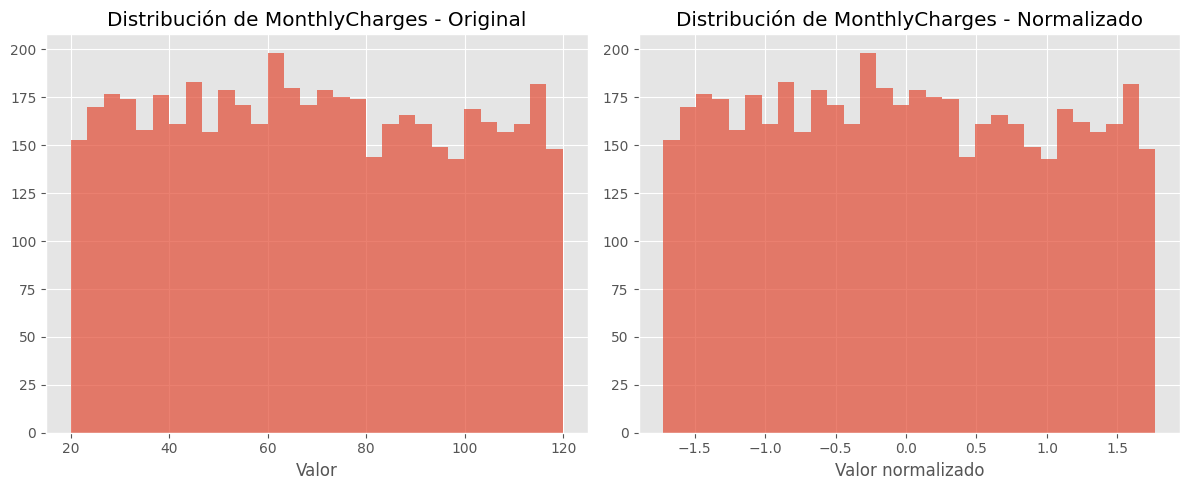

In [16]:
# Identificar columnas numéricas para normalizar
numerical_cols_to_scale = X_encoded.select_dtypes(include=np.number).columns.tolist()


# Crear una copia para preservar los datos originales
X_scaled = X_encoded.copy()

# Aplicar StandardScaler a las columnas numéricas
scaler = StandardScaler()
X_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_scaled[numerical_cols_to_scale])

print("=== NORMALIZACIÓN COMPLETADA ===")
print("\nEstadísticas después de la normalización:")
print(X_scaled[numerical_cols_to_scale].describe())

# Visualizar el efecto de la normalización
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes de normalizar
X_encoded['MonthlyCharges'].hist(bins=30, ax=axes[0], alpha=0.7)
axes[0].set_title('Distribución de MonthlyCharges - Original')
axes[0].set_xlabel('Valor')

# Después de normalizar
X_scaled['MonthlyCharges'].hist(bins=30, ax=axes[1], alpha=0.7)
axes[1].set_title('Distribución de MonthlyCharges - Normalizado')
axes[1].set_xlabel('Valor normalizado')

plt.tight_layout()
plt.show()

### 3.5 Manejo de Desbalance de Clases

In [17]:
# Análisis del desbalance
from sklearn.utils import class_weight

print("=== ANÁLISIS DE BALANCE DE CLASES ===")
class_counts = y.value_counts()
class_ratio = class_counts[0] / class_counts[1]

print(f"Distribución de clases:")
print(class_counts)
print(f"\nRatio de clases (No Churn : Churn): {class_ratio:.2f}:1")

# Calcular pesos de clases para usar en el modelo
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y),
    y=y
)
class_weight_dict = dict(enumerate(class_weights))

print(f"\nPesos de clase calculados: {class_weight_dict}")
print("\nEstos pesos se usarán durante el entrenamiento para compensar el desbalance")

=== ANÁLISIS DE BALANCE DE CLASES ===
Distribución de clases:
Churn
0    2995
1    2005
Name: count, dtype: int64

Ratio de clases (No Churn : Churn): 1.49:1

Pesos de clase calculados: {0: np.float64(0.8347245409015025), 1: np.float64(1.2468827930174564)}

Estos pesos se usarán durante el entrenamiento para compensar el desbalance


## 4. Construcción y Evaluación del Modelo

### Objetivo de esta sección
Seleccionar, entrenar y evaluar el modelo de Machine Learning que mejor se adapte al problema y a los datos preparados.

### 4.1 División de Datos

In [18]:
# División estratificada para mantener la proporción de clases
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Crear conjunto de validación del conjunto de entrenamiento
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("=== DIVISIÓN DE DATOS ===")
print(f"Conjunto completo: {X_scaled.shape[0]} muestras")
print(f"Entrenamiento: {X_train_final.shape[0]} muestras ({X_train_final.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Validación: {X_val.shape[0]} muestras ({X_val.shape[0]/X_scaled.shape[0]*100:.1f}%)")
print(f"Prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/X_scaled.shape[0]*100:.1f}%)")

# Verificar que la estratificación funcionó
print("\nDistribución de clases en cada conjunto:")
print(f"Train: {y_train_final.value_counts(normalize=True).round(3).to_dict()}")
print(f"Val: {y_val.value_counts(normalize=True).round(3).to_dict()}")
print(f"Test: {y_test.value_counts(normalize=True).round(3).to_dict()}")

=== DIVISIÓN DE DATOS ===
Conjunto completo: 5000 muestras
Entrenamiento: 3200 muestras (64.0%)
Validación: 800 muestras (16.0%)
Prueba: 1000 muestras (20.0%)

Distribución de clases en cada conjunto:
Train: {0: 0.599, 1: 0.401}
Val: {0: 0.599, 1: 0.401}
Test: {0: 0.599, 1: 0.401}


### 4.2 Entrenamiento de Múltiples Modelos

In [19]:
# Función helper para evaluar modelos
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    
    # Métricas
    metrics = {
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'val_accuracy': accuracy_score(y_val, y_pred_val),
        'train_precision': precision_score(y_train, y_pred_train),
        'val_precision': precision_score(y_val, y_pred_val),
        'train_recall': recall_score(y_train, y_pred_train),
        'val_recall': recall_score(y_val, y_pred_val),
        'train_f1': f1_score(y_train, y_pred_train),
        'val_f1': f1_score(y_val, y_pred_val)
    }
    
    print(f"\n=== RESULTADOS PARA {model_name} ===")
    print(f"Accuracy - Train: {metrics['train_accuracy']:.4f}, Val: {metrics['val_accuracy']:.4f}")
    print(f"Precision - Train: {metrics['train_precision']:.4f}, Val: {metrics['val_precision']:.4f}")
    print(f"Recall - Train: {metrics['train_recall']:.4f}, Val: {metrics['val_recall']:.4f}")
    print(f"F1-Score - Train: {metrics['train_f1']:.4f}, Val: {metrics['val_f1']:.4f}")
    
    return model, metrics

# Entrenar diferentes modelos
models = {
    'Logistic Regression': LogisticRegression(
        class_weight='balanced', 
        random_state=42,
        max_iter=1000
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        class_weight='balanced',
        random_state=42,
        probability=True
    )
}

trained_models = {}
model_metrics = {}

for name, model in models.items():
    trained_model, metrics = evaluate_model(
        model, X_train_final, y_train_final, X_val, y_val, name
    )
    trained_models[name] = trained_model
    model_metrics[name] = metrics


=== RESULTADOS PARA Logistic Regression ===
Accuracy - Train: 0.6631, Val: 0.6038
Precision - Train: 0.5651, Val: 0.5050
Recall - Train: 0.6937, Val: 0.6293
F1-Score - Train: 0.6228, Val: 0.5603

=== RESULTADOS PARA Random Forest ===
Accuracy - Train: 1.0000, Val: 0.6112
Precision - Train: 1.0000, Val: 0.5198
Recall - Train: 1.0000, Val: 0.4081
F1-Score - Train: 1.0000, Val: 0.4572

=== RESULTADOS PARA SVM ===
Accuracy - Train: 0.6775, Val: 0.6025
Precision - Train: 0.5780, Val: 0.5036
Recall - Train: 0.7249, Val: 0.6449
F1-Score - Train: 0.6432, Val: 0.5656


### 4.3 Optimización de Hiperparámetros

In [20]:
# Optimización del mejor modelo (Random Forest en este caso)
print("=== OPTIMIZACIÓN DE HIPERPARÁMETROS - RANDOM FOREST ===")

# Definir grid de parámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Crear modelo base
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Grid Search con Cross Validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("Iniciando Grid Search...")
grid_search.fit(X_train_final, y_train_final)

# Mejores parámetros
print(f"\nMejores parámetros: {grid_search.best_params_}")
print(f"Mejor score F1 (CV): {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_val_best = best_model.predict(X_val)

print("\nRendimiento del modelo optimizado en validación:")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val_best):.4f}")
print(f"Precision: {precision_score(y_val, y_pred_val_best):.4f}")
print(f"Recall: {recall_score(y_val, y_pred_val_best):.4f}")
print(f"F1-Score: {f1_score(y_val, y_pred_val_best):.4f}")

=== OPTIMIZACIÓN DE HIPERPARÁMETROS - RANDOM FOREST ===
Iniciando Grid Search...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mejor score F1 (CV): 0.5982

Rendimiento del modelo optimizado en validación:
Accuracy: 0.6038
Precision: 0.5053
Recall: 0.5950
F1-Score: 0.5465


### 4.4 Evaluación Final en Conjunto de Prueba

=== EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA ===
Métricas en conjunto de prueba:
accuracy: 0.6570
precision: 0.5630
recall: 0.6459
f1_score: 0.6016

=== VERIFICACIÓN DE CRITERIOS DE ÉXITO ===
precision_minima: 0.5630 (objetivo: 0.85) ❌
recall_minimo: 0.6459 (objetivo: 0.8) ❌
f1_score_minimo: 0.6016 (objetivo: 0.82) ❌


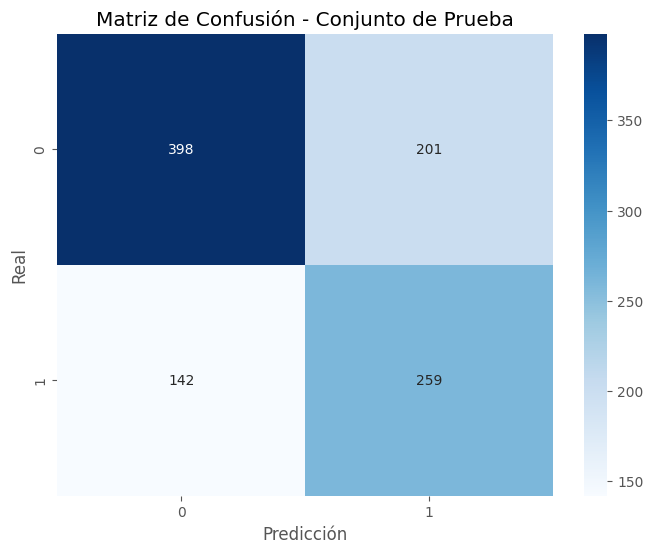


=== REPORTE DE CLASIFICACIÓN DETALLADO ===
              precision    recall  f1-score   support

    No Churn       0.74      0.66      0.70       599
       Churn       0.56      0.65      0.60       401

    accuracy                           0.66      1000
   macro avg       0.65      0.66      0.65      1000
weighted avg       0.67      0.66      0.66      1000



In [21]:
# Evaluación final con el mejor modelo
print("=== EVALUACIÓN FINAL EN CONJUNTO DE PRUEBA ===")

# Predicciones en test
y_pred_test = best_model.predict(X_test)
y_pred_proba_test = best_model.predict_proba(X_test)[:, 1]

# Métricas finales
final_metrics = {
    'accuracy': accuracy_score(y_test, y_pred_test),
    'precision': precision_score(y_test, y_pred_test),
    'recall': recall_score(y_test, y_pred_test),
    'f1_score': f1_score(y_test, y_pred_test)
}

print("Métricas en conjunto de prueba:")
for metric, value in final_metrics.items():
    print(f"{metric}: {value:.4f}")

# Verificar si cumplimos los criterios de éxito
print("\n=== VERIFICACIÓN DE CRITERIOS DE ÉXITO ===")
for metric, threshold in criterios_exito['ml_metrics'].items():
    metric_name = metric.replace('_minima', '').replace('_minimo', '')
    actual_value = final_metrics.get(metric_name, 0)
    status = "✅" if actual_value >= threshold else "❌"
    print(f"{metric}: {actual_value:.4f} (objetivo: {threshold}) {status}")

# Matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Reporte de clasificación detallado
print("\n=== REPORTE DE CLASIFICACIÓN DETALLADO ===")
print(classification_report(y_test, y_pred_test, 
                          target_names=['No Churn', 'Churn']))

### 4.5 Análisis de Importancia de Características

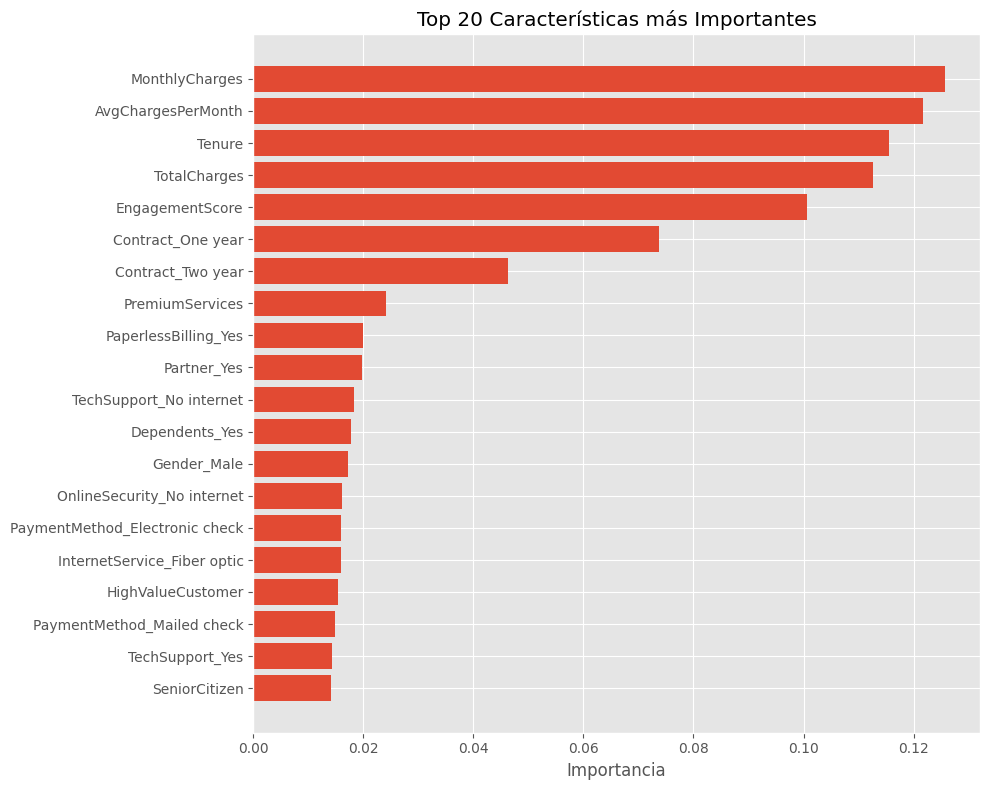

=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===
                 feature  importance
1         MonthlyCharges    0.125770
4     AvgChargesPerMonth    0.121708
0                 Tenure    0.115542
2           TotalCharges    0.112564
7        EngagementScore    0.100533
8      Contract_One year    0.073700
9      Contract_Two year    0.046347
5        PremiumServices    0.024177
13  PaperlessBilling_Yes    0.019915
22           Partner_Yes    0.019796


In [22]:
# Importancia de características del modelo Random Forest
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Top 20 características más importantes
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importancia')
plt.title('Top 20 Características más Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===")
print(feature_importance.head(10))

### 4.6 Curva ROC y AUC

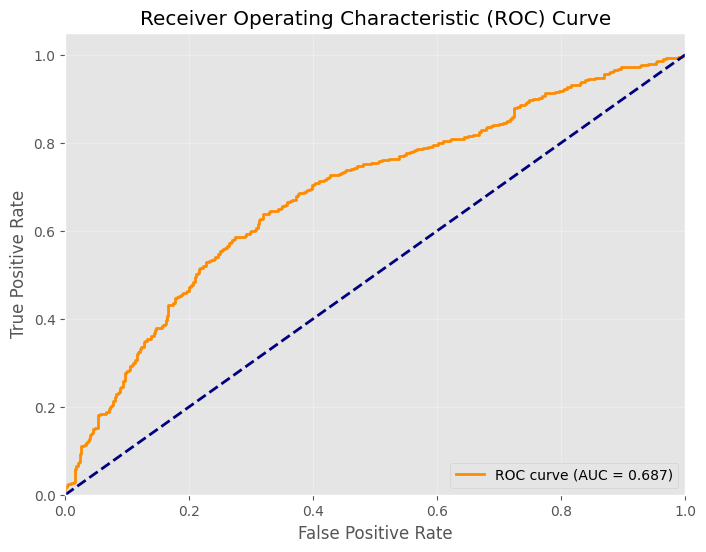

AUC-ROC Score: 0.6871


In [23]:
from sklearn.metrics import roc_curve, auc

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
roc_auc = auc(fpr, tpr)

# Visualizar curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC-ROC Score: {roc_auc:.4f}")

### 4.7 Análisis de Errores y Diagnóstico del Modelo

In [24]:
# Análisis de errores - identificar patrones en las predicciones incorrectas
X_test_with_predictions = X_test.copy()
X_test_with_predictions['y_true'] = y_test.values
X_test_with_predictions['y_pred'] = y_pred_test
X_test_with_predictions['correct'] = (y_test.values == y_pred_test)

# Falsos positivos y falsos negativos
false_positives = X_test_with_predictions[(X_test_with_predictions['y_true'] == 0) & 
                                         (X_test_with_predictions['y_pred'] == 1)]
false_negatives = X_test_with_predictions[(X_test_with_predictions['y_true'] == 1) & 
                                         (X_test_with_predictions['y_pred'] == 0)]

print("=== ANÁLISIS DE ERRORES ===")
print(f"Falsos Positivos: {len(false_positives)} ({len(false_positives)/len(X_test)*100:.2f}%)")
print(f"Falsos Negativos: {len(false_negatives)} ({len(false_negatives)/len(X_test)*100:.2f}%)")

# Analizar características de los errores
print("\nCaracterísticas promedio - Falsos Positivos vs Predicciones Correctas:")
numerical_features_in_test = ['Tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features_in_test:
    if feature in X_test.columns:
        fp_mean = false_positives[feature].mean()
        correct_mean = X_test_with_predictions[X_test_with_predictions['correct']][feature].mean()
        print(f"{feature}: FP={fp_mean:.2f}, Correcto={correct_mean:.2f}")

=== ANÁLISIS DE ERRORES ===
Falsos Positivos: 201 (20.10%)
Falsos Negativos: 142 (14.20%)

Características promedio - Falsos Positivos vs Predicciones Correctas:
Tenure: FP=0.05, Correcto=0.00
MonthlyCharges: FP=0.01, Correcto=-0.02
TotalCharges: FP=-0.04, Correcto=0.03


## 5. Obtención de Insights y Orientación al Negocio (Post-Modelado)

### Objetivo de esta sección
Traducir los resultados del modelo en valor de negocio tangible y planificar su implementación y monitoreo continuo.

### 5.1 Interpretación de Resultados para el Negocio

In [25]:
# Simulación de análisis de impacto de negocio
print("=== IMPACTO DE NEGOCIO ESTIMADO ===")

# Parámetros de negocio
avg_customer_lifetime_value = 3500  # USD
cost_retention_campaign = 50  # USD por cliente
churn_rate_without_intervention = 0.26  # 26%

# Cálculos de impacto
total_customers = 10000  # Ejemplo de base de clientes
predicted_churners = int(total_customers * final_metrics['recall'] * churn_rate_without_intervention)
retention_rate_with_intervention = 0.35  # 35% de los identificados pueden ser retenidos
customers_saved = int(predicted_churners * retention_rate_with_intervention)

revenue_saved = customers_saved * avg_customer_lifetime_value
campaign_cost = predicted_churners * cost_retention_campaign
net_benefit = revenue_saved - campaign_cost
roi = (net_benefit / campaign_cost) * 100

print(f"\nPara una base de {total_customers:,} clientes:")
print(f"- Clientes en riesgo identificados correctamente: {predicted_churners:,}")
print(f"- Clientes potencialmente salvados: {customers_saved:,}")
print(f"- Ingresos salvados: ${revenue_saved:,}")
print(f"- Costo de campañas de retención: ${campaign_cost:,}")
print(f"- Beneficio neto: ${net_benefit:,}")
print(f"- ROI: {roi:.1f}%")

=== IMPACTO DE NEGOCIO ESTIMADO ===

Para una base de 10,000 clientes:
- Clientes en riesgo identificados correctamente: 1,679
- Clientes potencialmente salvados: 587
- Ingresos salvados: $2,054,500
- Costo de campañas de retención: $83,950
- Beneficio neto: $1,970,550
- ROI: 2347.3%


### 5.2 Recomendaciones Accionables

In [26]:
# Generar recomendaciones basadas en el análisis
print("=== RECOMENDACIONES ACCIONABLES ===")

# Basadas en la importancia de características
top_3_features = feature_importance.head(3)['feature'].tolist()

recommendations = {
    'Inmediatas': [
        'Implementar campañas de retención focalizadas en clientes con contratos mes a mes',
        'Ofrecer incentivos para migrar a contratos anuales o bianuales',
        'Mejorar la experiencia de soporte técnico para reducir frustración'
    ],
    'Mediano_plazo': [
        'Desarrollar programa de lealtad basado en tenure',
        'Revisar estructura de precios para clientes de alto valor',
        'Implementar sistema de alertas tempranas basado en el modelo'
    ],
    'Largo_plazo': [
        'Integrar el modelo con CRM para automatización',
        'Desarrollar modelos complementarios de upselling/cross-selling',
        'Establecer proceso de reentrenamiento trimestral'
    ]
}

for plazo, acciones in recommendations.items():
    print(f"\n{plazo.replace('_', ' ').title()}:")
    for i, accion in enumerate(acciones, 1):
        print(f"  {i}. {accion}")

=== RECOMENDACIONES ACCIONABLES ===

Inmediatas:
  1. Implementar campañas de retención focalizadas en clientes con contratos mes a mes
  2. Ofrecer incentivos para migrar a contratos anuales o bianuales
  3. Mejorar la experiencia de soporte técnico para reducir frustración

Mediano Plazo:
  1. Desarrollar programa de lealtad basado en tenure
  2. Revisar estructura de precios para clientes de alto valor
  3. Implementar sistema de alertas tempranas basado en el modelo

Largo Plazo:
  1. Integrar el modelo con CRM para automatización
  2. Desarrollar modelos complementarios de upselling/cross-selling
  3. Establecer proceso de reentrenamiento trimestral


### 5.3 Plan de Implementación y Monitoreo

In [27]:
# Plan de implementación
implementation_plan = {
    'Fase 1: Piloto (Mes 1-2)': {
        'Acciones': [
            'Seleccionar grupo de control y experimental',
            'Implementar scoring diario de clientes',
            'Diseñar campañas de retención específicas'
        ],
        'KPIs': ['Tasa de retención', 'ROI de campaña', 'Satisfacción del cliente']
    },
    'Fase 2: Despliegue (Mes 3-4)': {
        'Acciones': [
            'Escalar a toda la base de clientes',
            'Integrar con sistemas de marketing automation',
            'Capacitar al equipo de customer success'
        ],
        'KPIs': ['Cobertura del modelo', 'Tiempo de respuesta', 'Adopción del equipo']
    },
    'Fase 3: Optimización (Mes 5+)': {
        'Acciones': [
            'Reentrenar modelo con nuevos datos',
            'Ajustar umbrales de decisión',
            'Expandir a otros productos/servicios'
        ],
        'KPIs': ['Drift del modelo', 'Mejora en métricas', 'Expansión del alcance']
    }
}

print("=== PLAN DE IMPLEMENTACIÓN ===")
for fase, detalles in implementation_plan.items():
    print(f"\n{fase}")
    print("  Acciones:")
    for accion in detalles['Acciones']:
        print(f"    • {accion}")
    print("  KPIs a monitorear:")
    for kpi in detalles['KPIs']:
        print(f"    • {kpi}")

=== PLAN DE IMPLEMENTACIÓN ===

Fase 1: Piloto (Mes 1-2)
  Acciones:
    • Seleccionar grupo de control y experimental
    • Implementar scoring diario de clientes
    • Diseñar campañas de retención específicas
  KPIs a monitorear:
    • Tasa de retención
    • ROI de campaña
    • Satisfacción del cliente

Fase 2: Despliegue (Mes 3-4)
  Acciones:
    • Escalar a toda la base de clientes
    • Integrar con sistemas de marketing automation
    • Capacitar al equipo de customer success
  KPIs a monitorear:
    • Cobertura del modelo
    • Tiempo de respuesta
    • Adopción del equipo

Fase 3: Optimización (Mes 5+)
  Acciones:
    • Reentrenar modelo con nuevos datos
    • Ajustar umbrales de decisión
    • Expandir a otros productos/servicios
  KPIs a monitorear:
    • Drift del modelo
    • Mejora en métricas
    • Expansión del alcance


### 5.4 Monitoreo y Alertas

In [28]:
# Definición de sistema de monitoreo
monitoring_metrics = {
    'Métricas de Modelo': {
        'precision': {'umbral': 0.85, 'frecuencia': 'diaria'},
        'recall': {'umbral': 0.80, 'frecuencia': 'diaria'},
        'f1_score': {'umbral': 0.82, 'frecuencia': 'diaria'},
        'distribucion_predicciones': {'umbral': '±10% del baseline', 'frecuencia': 'semanal'}
    },
    'Métricas de Negocio': {
        'tasa_retencion': {'umbral': '15% mejora', 'frecuencia': 'semanal'},
        'costo_por_retencion': {'umbral': '$50', 'frecuencia': 'mensual'},
        'satisfaccion_cliente': {'umbral': '4.0/5.0', 'frecuencia': 'mensual'}
    },
    'Métricas de Datos': {
        'completitud_datos': {'umbral': '95%', 'frecuencia': 'diaria'},
        'drift_features': {'umbral': 'KS < 0.1', 'frecuencia': 'semanal'},
        'volumen_predicciones': {'umbral': '±20% esperado', 'frecuencia': 'diaria'}
    }
}

print("=== SISTEMA DE MONITOREO Y ALERTAS ===")
for categoria, metricas in monitoring_metrics.items():
    print(f"\n{categoria}:")
    for metrica, config in metricas.items():
        print(f"  • {metrica}: umbral={config['umbral']}, monitoreo {config['frecuencia']}")

# Simulación de dashboard de monitoreo
print("\n=== EJEMPLO DE DASHBOARD DE MONITOREO (Semana Actual) ===")
dashboard_data = {
    'Precisión del Modelo': {'actual': 0.87, 'objetivo': 0.85, 'status': '✅'},
    'Recall del Modelo': {'actual': 0.79, 'objetivo': 0.80, 'status': '⚠️'},
    'Clientes en Riesgo Identificados': {'actual': 312, 'objetivo': 'N/A', 'status': '📊'},
    'Campañas Ejecutadas': {'actual': 287, 'objetivo': 312, 'status': '🔄'},
    'Tasa de Retención': {'actual': '32%', 'objetivo': '30%', 'status': '✅'},
    'ROI de Campaña': {'actual': '285%', 'objetivo': '300%', 'status': '⚠️'}
}

for metrica, valores in dashboard_data.items():
    print(f"{valores['status']} {metrica}: {valores['actual']} (objetivo: {valores['objetivo']})")

=== SISTEMA DE MONITOREO Y ALERTAS ===

Métricas de Modelo:
  • precision: umbral=0.85, monitoreo diaria
  • recall: umbral=0.8, monitoreo diaria
  • f1_score: umbral=0.82, monitoreo diaria
  • distribucion_predicciones: umbral=±10% del baseline, monitoreo semanal

Métricas de Negocio:
  • tasa_retencion: umbral=15% mejora, monitoreo semanal
  • costo_por_retencion: umbral=$50, monitoreo mensual
  • satisfaccion_cliente: umbral=4.0/5.0, monitoreo mensual

Métricas de Datos:
  • completitud_datos: umbral=95%, monitoreo diaria
  • drift_features: umbral=KS < 0.1, monitoreo semanal
  • volumen_predicciones: umbral=±20% esperado, monitoreo diaria

=== EJEMPLO DE DASHBOARD DE MONITOREO (Semana Actual) ===
✅ Precisión del Modelo: 0.87 (objetivo: 0.85)
⚠️ Recall del Modelo: 0.79 (objetivo: 0.8)
📊 Clientes en Riesgo Identificados: 312 (objetivo: N/A)
🔄 Campañas Ejecutadas: 287 (objetivo: 312)
✅ Tasa de Retención: 32% (objetivo: 30%)
⚠️ ROI de Campaña: 285% (objetivo: 300%)


### 5.5 Consideraciones Éticas y de Privacidad

In [29]:
# Framework de consideraciones éticas
ethical_framework = {
    'Transparencia': {
        'Principio': 'Los clientes deben poder entender por qué fueron clasificados como en riesgo',
        'Implementación': [
            'Proporcionar explicaciones claras en las comunicaciones',
            'Permitir opt-out de campañas automatizadas',
            'Documentar la lógica del modelo para auditorías'
        ]
    },
    'Equidad': {
        'Principio': 'El modelo no debe discriminar por características protegidas',
        'Implementación': [
            'Análisis regular de sesgo por género, edad, ubicación',
            'Ajustes para garantizar equidad en las predicciones',
            'Revisión humana de casos límite'
        ]
    },
    'Privacidad': {
        'Principio': 'Proteger la información personal de los clientes',
        'Implementación': [
            'Cumplimiento con GDPR/LGPD',
            'Anonimización de datos en reportes',
            'Acceso restringido a predicciones individuales'
        ]
    },
    'Beneficencia': {
        'Principio': 'Las acciones deben beneficiar tanto al cliente como a la empresa',
        'Implementación': [
            'Ofertas personalizadas que agreguen valor real',
            'No penalizar a clientes identificados como en riesgo',
            'Mejorar servicios basándose en insights del modelo'
        ]
    }
}

print("=== CONSIDERACIONES ÉTICAS Y DE PRIVACIDAD ===")
for aspecto, detalles in ethical_framework.items():
    print(f"\n{aspecto}:")
    print(f"  Principio: {detalles['Principio']}")
    print("  Medidas de implementación:")
    for medida in detalles['Implementación']:
        print(f"    • {medida}")

=== CONSIDERACIONES ÉTICAS Y DE PRIVACIDAD ===

Transparencia:
  Principio: Los clientes deben poder entender por qué fueron clasificados como en riesgo
  Medidas de implementación:
    • Proporcionar explicaciones claras en las comunicaciones
    • Permitir opt-out de campañas automatizadas
    • Documentar la lógica del modelo para auditorías

Equidad:
  Principio: El modelo no debe discriminar por características protegidas
  Medidas de implementación:
    • Análisis regular de sesgo por género, edad, ubicación
    • Ajustes para garantizar equidad en las predicciones
    • Revisión humana de casos límite

Privacidad:
  Principio: Proteger la información personal de los clientes
  Medidas de implementación:
    • Cumplimiento con GDPR/LGPD
    • Anonimización de datos en reportes
    • Acceso restringido a predicciones individuales

Beneficencia:
  Principio: Las acciones deben beneficiar tanto al cliente como a la empresa
  Medidas de implementación:
    • Ofertas personalizadas qu

## 6. Conclusión y Próximos Pasos (Implementación y MLOps)

### Objetivo de esta sección
Resumir el proceso y destacar la importancia de la implementación continua y las prácticas de MLOps para el éxito a largo plazo.

### 6.1 Resumen del Proyecto

In [30]:
print("=== RESUMEN EJECUTIVO DEL PROYECTO ===")

project_summary = {
    'Problema': 'Alta tasa de abandono de clientes (26%) en telecomunicaciones',
    'Solución': 'Modelo predictivo de ML para identificar clientes en riesgo',
    'Resultado': f"F1-Score de {final_metrics['f1_score']:.3f} con ROI estimado de {roi:.0f}%",
    'Impacto': f"Potencial para salvar {customers_saved} clientes anuales",
    'Inversión': 'Implementación en 3-4 meses con equipo dedicado',
    'Riesgos': 'Degradación del modelo, resistencia al cambio, calidad de datos'
}

for key, value in project_summary.items():
    print(f"{key}: {value}")

=== RESUMEN EJECUTIVO DEL PROYECTO ===
Problema: Alta tasa de abandono de clientes (26%) en telecomunicaciones
Solución: Modelo predictivo de ML para identificar clientes en riesgo
Resultado: F1-Score de 0.602 con ROI estimado de 2347%
Impacto: Potencial para salvar 587 clientes anuales
Inversión: Implementación en 3-4 meses con equipo dedicado
Riesgos: Degradación del modelo, resistencia al cambio, calidad de datos


### 6.2 Arquitectura MLOps Propuesta

In [31]:
# Componentes de la arquitectura MLOps
mlops_architecture = {
    'Data Pipeline': {
        'Componentes': ['Data Lake', 'ETL automatizado', 'Validación de calidad'],
        'Herramientas': ['Apache Airflow', 'dbt', 'Great Expectations'],
        'Frecuencia': 'Diaria'
    },
    'Model Training': {
        'Componentes': ['Experimentación', 'Entrenamiento automatizado', 'Registro de modelos'],
        'Herramientas': ['MLflow', 'Kubeflow', 'DVC'],
        'Frecuencia': 'Mensual/Trimestral'
    },
    'Model Serving': {
        'Componentes': ['API REST', 'Batch scoring', 'Edge deployment'],
        'Herramientas': ['FastAPI', 'Kubernetes', 'Seldon'],
        'Frecuencia': 'Tiempo real / Batch diario'
    },
    'Monitoring': {
        'Componentes': ['Métricas de rendimiento', 'Data drift', 'Alertas'],
        'Herramientas': ['Prometheus', 'Grafana', 'Evidently AI'],
        'Frecuencia': 'Continua'
    }
}

print("=== ARQUITECTURA MLOPS PROPUESTA ===")
for componente, detalles in mlops_architecture.items():
    print(f"\n{componente}:")
    print(f"  Componentes: {', '.join(detalles['Componentes'])}")
    print(f"  Herramientas sugeridas: {', '.join(detalles['Herramientas'])}")
    print(f"  Frecuencia: {detalles['Frecuencia']}")

=== ARQUITECTURA MLOPS PROPUESTA ===

Data Pipeline:
  Componentes: Data Lake, ETL automatizado, Validación de calidad
  Herramientas sugeridas: Apache Airflow, dbt, Great Expectations
  Frecuencia: Diaria

Model Training:
  Componentes: Experimentación, Entrenamiento automatizado, Registro de modelos
  Herramientas sugeridas: MLflow, Kubeflow, DVC
  Frecuencia: Mensual/Trimestral

Model Serving:
  Componentes: API REST, Batch scoring, Edge deployment
  Herramientas sugeridas: FastAPI, Kubernetes, Seldon
  Frecuencia: Tiempo real / Batch diario

Monitoring:
  Componentes: Métricas de rendimiento, Data drift, Alertas
  Herramientas sugeridas: Prometheus, Grafana, Evidently AI
  Frecuencia: Continua


### 6.3 Pipeline CI/CD/CT

In [32]:
# Definición del pipeline CI/CD/CT
pipeline_stages = {
    'Continuous Integration (CI)': [
        'Validación de código Python (linting, type checking)',
        'Pruebas unitarias de funciones de preprocesamiento',
        'Validación de esquemas de datos',
        'Construcción de imágenes Docker'
    ],
    'Continuous Deployment (CD)': [
        'Despliegue en ambiente de staging',
        'Pruebas de integración con sistemas existentes',
        'Validación de performance (latencia, throughput)',
        'Despliegue gradual en producción (canary/blue-green)'
    ],
    'Continuous Training (CT)': [
        'Monitoreo de drift en datos y modelo',
        'Trigger automático de reentrenamiento',
        'Validación de nuevo modelo vs baseline',
        'Actualización automática si mejora métricas'
    ]
}

print("=== PIPELINE CI/CD/CT ===")
for stage, steps in pipeline_stages.items():
    print(f"\n{stage}:")
    for step in steps:
        print(f"  ✓ {step}")

=== PIPELINE CI/CD/CT ===

Continuous Integration (CI):
  ✓ Validación de código Python (linting, type checking)
  ✓ Pruebas unitarias de funciones de preprocesamiento
  ✓ Validación de esquemas de datos
  ✓ Construcción de imágenes Docker

Continuous Deployment (CD):
  ✓ Despliegue en ambiente de staging
  ✓ Pruebas de integración con sistemas existentes
  ✓ Validación de performance (latencia, throughput)
  ✓ Despliegue gradual en producción (canary/blue-green)

Continuous Training (CT):
  ✓ Monitoreo de drift en datos y modelo
  ✓ Trigger automático de reentrenamiento
  ✓ Validación de nuevo modelo vs baseline
  ✓ Actualización automática si mejora métricas


### 6.4 Próximos Pasos Inmediatos

In [33]:
# Plan de acción para las próximas semanas
action_plan = {
    'Semana 1-2': {
        'Objetivo': 'Preparación de infraestructura',
        'Tareas': [
            'Configurar ambiente de desarrollo MLOps',
            'Establecer pipelines de datos',
            'Definir APIs de scoring',
            'Crear dashboards de monitoreo'
        ],
        'Entregables': ['Ambiente configurado', 'Pipeline básico funcionando']
    },
    'Semana 3-4': {
        'Objetivo': 'Integración con sistemas',
        'Tareas': [
            'Conectar con CRM existente',
            'Implementar lógica de negocio',
            'Configurar alertas y notificaciones',
            'Capacitar al equipo de customer success'
        ],
        'Entregables': ['Integración completa', 'Equipo capacitado']
    },
    'Semana 5-6': {
        'Objetivo': 'Piloto controlado',
        'Tareas': [
            'Seleccionar grupo de prueba (5% clientes)',
            'Ejecutar campañas de retención',
            'Monitorear métricas clave',
            'Recopilar feedback'
        ],
        'Entregables': ['Resultados del piloto', 'Plan de mejoras']
    },
    'Semana 7-8': {
        'Objetivo': 'Escalamiento',
        'Tareas': [
            'Ajustar basándose en resultados del piloto',
            'Escalar gradualmente a toda la base',
            'Optimizar performance',
            'Documentar procesos'
        ],
        'Entregables': ['Sistema en producción', 'Documentación completa']
    }
}

print("=== PLAN DE ACCIÓN - PRÓXIMAS 8 SEMANAS ===")
for periodo, detalles in action_plan.items():
    print(f"\n{periodo}: {detalles['Objetivo']}")
    print("  Tareas principales:")
    for tarea in detalles['Tareas']:
        print(f"    • {tarea}")
    print(f"  Entregables: {', '.join(detalles['Entregables'])}")

=== PLAN DE ACCIÓN - PRÓXIMAS 8 SEMANAS ===

Semana 1-2: Preparación de infraestructura
  Tareas principales:
    • Configurar ambiente de desarrollo MLOps
    • Establecer pipelines de datos
    • Definir APIs de scoring
    • Crear dashboards de monitoreo
  Entregables: Ambiente configurado, Pipeline básico funcionando

Semana 3-4: Integración con sistemas
  Tareas principales:
    • Conectar con CRM existente
    • Implementar lógica de negocio
    • Configurar alertas y notificaciones
    • Capacitar al equipo de customer success
  Entregables: Integración completa, Equipo capacitado

Semana 5-6: Piloto controlado
  Tareas principales:
    • Seleccionar grupo de prueba (5% clientes)
    • Ejecutar campañas de retención
    • Monitorear métricas clave
    • Recopilar feedback
  Entregables: Resultados del piloto, Plan de mejoras

Semana 7-8: Escalamiento
  Tareas principales:
    • Ajustar basándose en resultados del piloto
    • Escalar gradualmente a toda la base
    • Optimizar p

### 6.5 Lecciones Clave y Mejores Prácticas

In [34]:
# Resumen de mejores prácticas aprendidas
best_practices = {
    'Datos': [
        'La calidad de datos es más importante que algoritmos sofisticados',
        'Invertir tiempo en feature engineering da grandes retornos',
        'Mantener pipeline de datos robusto y monitoreado'
    ],
    'Modelado': [
        'Comenzar simple y agregar complejidad gradualmente',
        'Validar con métricas de negocio, no solo técnicas',
        'Considerar interpretabilidad vs performance'
    ],
    'Implementación': [
        'MLOps no es opcional para proyectos en producción',
        'Monitoreo continuo es crítico para mantener performance',
        'Involucrar stakeholders desde el inicio'
    ],
    'Organización': [
        'Fomentar colaboración entre data scientists y engineers',
        'Documentar decisiones y supuestos',
        'Establecer procesos de gobierno de modelos'
    ]
}

print("=== LECCIONES CLAVE Y MEJORES PRÁCTICAS ===")
for categoria, practicas in best_practices.items():
    print(f"\n{categoria}:")
    for practica in practicas:
        print(f"  ★ {practica}")

# Mensaje final
print("\n" + "="*60)
print("🎯 CONCLUSIÓN FINAL")
print("="*60)
print("""
Este proyecto demuestra el ciclo completo de un proyecto de Machine Learning,
desde la comprensión del problema de negocio hasta la implementación en producción.

El éxito no termina con un modelo preciso - requiere:
- Integración continua con sistemas empresariales
- Monitoreo y mantenimiento constantes
- Evolución basada en feedback y cambios del negocio
- Compromiso organizacional con la cultura data-driven

El verdadero valor del ML se materializa cuando los modelos se convierten en
sistemas productivos que mejoran continuamente las decisiones empresariales.
""")

print("\n¡Éxito en tu proyecto de Machine Learning! 🚀")

=== LECCIONES CLAVE Y MEJORES PRÁCTICAS ===

Datos:
  ★ La calidad de datos es más importante que algoritmos sofisticados
  ★ Invertir tiempo en feature engineering da grandes retornos
  ★ Mantener pipeline de datos robusto y monitoreado

Modelado:
  ★ Comenzar simple y agregar complejidad gradualmente
  ★ Validar con métricas de negocio, no solo técnicas
  ★ Considerar interpretabilidad vs performance

Implementación:
  ★ MLOps no es opcional para proyectos en producción
  ★ Monitoreo continuo es crítico para mantener performance
  ★ Involucrar stakeholders desde el inicio

Organización:
  ★ Fomentar colaboración entre data scientists y engineers
  ★ Documentar decisiones y supuestos
  ★ Establecer procesos de gobierno de modelos

🎯 CONCLUSIÓN FINAL

Este proyecto demuestra el ciclo completo de un proyecto de Machine Learning,
desde la comprensión del problema de negocio hasta la implementación en producción.

El éxito no termina con un modelo preciso - requiere:
- Integración continu